#Transfer Learning for Credit Scoring
## Fahad Ahmed, Maksym Lesyk
### *Humboldt University of Berlin*

#**INTRODUCTION**

The *purpose* of this paper is to develop a meaningful tranfer learning model to cover for the gaps where
traditional bank credit scoring does not work or lacks sufficient reasoning. Per usual, the approach involves a statistical compilation of a borrower's past credit behaviour in order to define one's
creditworthiness. However, as such, offering credit to un-banked or under-banked populations
or micro to small businesses, where limited historical data is available remains mainly underdeveloped and costs banks
billions of euros annualy. For such, a manual, expert-based approach is predominantly used, which is prone to being wrong due to its subjective nature. This creates several issues, one of the main ones being that lenders may be forced to pay very high fees or may not be ordered any credit at all.

The area usage of transfer learning for building credit scoring models is underesearched. It is potential solution to the above-described problem, whereas required information can be obtained from alternative sources, some of them being, for example, utility bills, annual income, tax payments etc [1].

The goal of this paper is also to answer the question of whether thus it is possible to transfer knowledge from one market to another, and if so, then how?

#**BASIC DEFINITIONS**

There is no unanimous view on how to formally present transfer learning. On this matter Pan provides us with a specific model [2].
Integral parts of transfer learning are a “domain” and a “task”. A domain, which is respresented by a D, consists of two components: a feature space X and a marginal probability distribution P(X), where X = (x1,...,xn) belongs to *{X}*. *{X}* is the space of all term vectors, xi
is the ith term vector corresponding to some samples, and X is a particular learning sample. In general, if two domains are different, then they may have different feature spaces or different marginal probability distributions.
Given a specific domain, D = {_{X}_, P(X}, a task consists of two components: a label space Y and an objective function f(·) with a predictive purpose (denoted by *{T}* = {Y, f(·)}), which is not observed but is learned from the training data, which consist of pairs {xi, yi}, where xi belongs to X and yi belongs to Y. The
function f(·) can be used to predict the corresponding label f(x) of a new instance x. f(x) can be written as P(y|x). Y is the set of all labels, which is True or False for a binary classification task, and yi is “True” or “False”.

For simplicity, Pan only considers the case where there is one source domain DS, and one target domain, DT , as this is the most popular of the research works. More specifically the source domain data is denoted as DS = {(xS1, yS1 ), . . . , (xSnS, ySnS)}, where xSi belongs to XS is the data instance and ySi belongs to YS is the corresponding class label. DS can
be a set of term vectors together with their associated true or false class labels. Similarly, target domain data is denoted as DT = {(xT1, yT1 ), . . . , (xTnT, yTnT)}, where the input xTi is in XT and yTi
belongs to YT is the corresponding output. In most cases, 0 <= nT << nS.

One of the definitions given by Pan describes transfer learning as [2] "*Given a source domain DS
and learning task TS, a target domain DT and learning task
TT , transfer learning aims to help improve the learning of the
target predictive function fT (·) in DT using the knowledge in
DS and TS, where DS does not equal DT, or TS does not equal TT*"

#**THEORATICAL BACKGROUND**

Three main issues must be resolved when finding a suitable transfer learining model: 1. What to trasfer, 2. How to transfer, 3. When to transfer [2].

1. "What to transfer" refers to the part of knowledge that should be transferred.

2. "How to transfer" refers to the techniques and algorithms to be used in building a data transfer model.

3. "When to transfer" refers to the issue of whether transfer learning should or should not be performed. In the worst-case scenario transfer learning may even be harmful to the target domain (negative transfer).

*Negative transfer* is described as a situation when the source domain is not well-related
to the target and the target learner can be negatively impacted by this weak
relation. The negative transfer concept remains underresearched, however it should be considered whether an application of a certain dataset may be harmful for the overall performance of a certain model.

There are four main categories of transfer learning: Instance-transfer, Feature-representation-transfer, Parameter transfer, Relational-knowledge transfer. The basic understanding of their applications is summarized below:

1. Instance-transfer - To re-weight some labeled data in the source domain for use in the target domain
2. Feature-representation-transfer - Find a good feature representation that reduces difference between the source and the target
3. Parameter transfer - Discover shared parameters or priors between the source domain and target domain models, which can benefit for transfer learning.
4. Relational-knowledge transfer - Build mapping of relational knowledge between the source domain and the target domains. Both
domains are relational domains and i.i.d assumption is relaxed in each domain

In this paper we predominantly focused on relational knowledge and parameter sharing, some of the aspects of which will be discussed more thoroughly later.

Furthermore, based on the relationship between source and target domains/learning tasks transfer learning can be further subdivided as follows in the table below:
  \begin{array}{|c|c|c|}\hline\\
  \ Learning\;Settings & \ Source\;and\;Target\;Domains & \ Source\; and\; Target\; Tasks\\ \hline\\
  Traditional\; Machine\; Learning & the\; same & the\; same \\ \hline\\
  Inductive\; Transfer\; Learning & the\; same & different\; but\; related \\ \hline\\
  Unsupervised\; Transfer\; Learning & different\; but\; related & different\; but\; related \\ \hline\\
  Transductive\; Transfer\; Learning & different\; but\; related & the\; same \\ \hline\\
  \end{array}

The area of credit scoring, which is the purpose of this transfer learning research is predominantly concentrated on Transductive TL, which is also known as Deep Domain Adaptation [3].

Next we will delve deeper into parameter sharing and deep domain adaptation.
## Deep Domain Adaptation
A paper from Xu provides us with the definition of deep domain adaptation [3]. Given a source domain DS for task TS and a target domain DT for task TT, where DS≠DT. Domain adaptation aims to learn a predictive function fT (·) so that the knowledge obtained from DS and TS can be used for enhancing fT (·).
Deep Domain Adaptation for the most part focuses on how to utilize neural networks for this purpose.

The deep neural architecture is usually specifically designed to learn representation with back-propagation from the source and target data for domain adaptation. The basic idea of domain adaptation is that it is possible to find some schemes that are different to the domain used or sharing features from datasets that are related. It is possible to reduce the difference in domains and for this purpose to categorize deep domain adaptation approaches into three main ways: fine-tuning networks, domain-adversarial learning, and sample-reconstruction approach [3].

###*Fine-tuning networks*

The basic idea behind transfer learning is that we train our model on the original dataset and then transfer the layers onto the new dataset with the layers being frozen, i.e. weights do not change during the new training rounds. Then we add new layers that are to be trained on the new dataset to turn into specific predictions. Fine-tuning involves to progressive unfreezing of all or some of the initial layers to enhance the results of the new model. For a pre-trained model we can keep its earlier layers fixed/frozen and only fine-tune the weights in the high-level portion of the network by continuing back-propagation or it is possible to do with all the layers if needed. During fine-tuning the networks, the discrepancy between the source domain and target domain is usually measured by a criterion such as class labels based criterion, and statistic criterion. Instead of directly using the measurement as a criterion to adjust networks, regularization techniques can also be used for fine-tuning, which mainly includes parameter regularization and sample regularization [3]. This is the way used in this paper as we trained one neural network on one dataset and then transferred the knowledge receive to another neural network based on another dateset.

## **PARAMETER SHARING (PARAMETER TRANSFER)**

Parameter-transfer approach assumes that the
source tasks and the target tasks share some parameters or
prior distributions of the hyper-parameters of the models. The
transferred knowledge is encoded into the shared parameters
or priors. Thus, by discovering the shared parameters or priors,
knowledge can be transferred across tasks [2].

One example is the paper by Tommasi, where he addresses the transfer learning environment characterized by limited labeled target data and multiple labeled source domains where each source corresponds to a particular class. In this case, each source is able to build a binary learner to predict that class. The objective is to build a target binary learner for a new class using minimal labeled target data and knowledge transferred from the multiple source learners. The Tommasi approach,
called the multi-model knowledge transfer (MMKT) method, extends the method proposed by Tommasi earlier that only transfers a single source domain. Experiments are performed on the application of image recognition where classification accuracy is measured as the performance metric. Transfer learning methods tested include an average weight approach (same as Tommasi but all source weights are equal), and the earlier Tommasi approach. A baseline approach is tested, which is trained on the limited
labeled target data. The best performing method is Tommasi, followed by the average weight, earlier method proposed by Tommasi, and the baseline approach [4][5].

There are numerous methods how this type of transfer learning can be used, but the basics remain - discover shared parameters or priors between the source domain and target domain models, which can benefit for transfer learning.



In [ ]:
import os
import pandas as pd
import re
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
#from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms, utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics, preprocessing
from sklearn.utils import class_weight
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from clean_datasets import read_lendingclub, preprocess_lendingclub
from helper_functions import features_target, minmax_scale, custom_init, trim
from train_generic import train

In [ ]:
#selecting features from the lending club dataset

features = ['installment','loan_amnt', 'term', 'int_rate', 'fico_range_low', 'fico_range_high',
           'sub_grade', 'home_ownership', 'emp_length', 'acc_open_past_24mths',
           'annual_inc', 'verification_status', 'loan_status', 'avg_cur_bal',
           'purpose', 'dti',
           'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc','tot_hi_cred_lim',
           'initial_list_status', 'application_type', 'pub_rec_bankruptcies', 'earliest_cr_line']

#separating numeric and categorical features
categorical = ['term', 'sub_grade', 'home_ownership', 'verification_status', 'initial_list_status', 'application_type']
numeric = ['revol_util', 'int_rate', 'installment', 'tot_hi_cred_lim',
           'emp_length', 'dti', 'avg_cur_bal', 'acc_open_past_24mths',
          'annual_inc', 'loan_amnt','fico_range_high', 'fico_range_low', 'open_acc',
           'pub_rec', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies']

In [ ]:
#using custom function to read lending club dataset

df = read_lendingclub('./Datasets/archive/accepted.csv', features = features)
df = df.loc[df['application_type'] == 'Individual']

C:\Users\fahad\AppData\Local\Temp/ipykernel_17116/1502198364.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  df = read_lendingclub('./Datasets/archive/accepted.csv', features = features)


In [ ]:
#separating datasets for diffferent purposes

df_debtcon = df.loc[df['purpose'] == 'debt_consolidation']
df_credit = df.loc[df['purpose'] == 'credit_card']

#using custom function to preprocess the dataset

df_debtcon = preprocess_lendingclub(df_debtcon, numeric_features = numeric, categorical_features = categorical)
df_credit = preprocess_lendingclub(df_credit, numeric_features = numeric, categorical_features = categorical)


In [ ]:
numeric_features =  ['revol_util', 'int_rate', 'installment', 'tot_hi_cred_lim',
           'emp_length', 'dti', 'loan_amnt', 'avg_cur_bal', 'acc_open_past_24mths',
          'annual_inc','fico_range_high', 'fico_range_low', 'open_acc',
           'pub_rec', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies', 'cover']

#applying minmax scaling

df_debtcon = minmax_scale(trim(df_debtcon, numeric_features), numeric_features)
df_credit = minmax_scale(trim(df_credit, numeric_features), numeric_features)

In [ ]:
#selecting a subset of features

subset = ['revol_util', 'int_rate', 'installment', 'tot_hi_cred_lim',
           'emp_length', 'dti', 'loan_amnt', 'avg_cur_bal', 'acc_open_past_24mths',
          'annual_inc','fico_range_high', 'fico_range_low', 'open_acc',
           'pub_rec', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies', 'cover', 'target','earliest_cr_line_year_1', 'earliest_cr_line_year_2','earliest_cr_line_year_3','earliest_cr_line_year_4','earliest_cr_line_year_5','earliest_cr_line_year_6','earliest_cr_line_year_7','earliest_cr_line_year_8']
df_debtcon = df_debtcon[subset]
df_credit = df_credit[subset]

In [ ]:
#separating features and target

X_debtcon, y_debtcon = features_target(df_debtcon, target = 'target')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_debtcon, y_debtcon, stratify = y_debtcon, test_size = 0.2)
trainset = torch.utils.data.TensorDataset(torch.tensor(X_train.to_numpy(), dtype = torch.float32), torch.tensor(y_train.to_numpy(), dtype = torch.float32).reshape(-1,1))
testset = torch.utils.data.TensorDataset(torch.tensor(X_test.to_numpy(), dtype = torch.float32), torch.tensor(y_test.to_numpy(), dtype = torch.float32).reshape(-1,1))

# **MODEL**

We construct the neural network below and train it on the lending club dataset on debt consolidation. We build a six-layer deep neural network for the task, but we keep the size of the hidden layers constant and small. The hidden layers near the final output layer usually learn task-specific features, whereas the initial layers are known to learn domain-invariant features. We hope that we will be extract some domain-invariant information using the first three layers, which is why we decided to build a deep yet small neural network.

LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

In [ ]:
class ClassifyBAD(nn.Module):
    def __init__(self, dropout= 0.3,
                 no_of_hiddens1=28, no_of_hiddens2=28, no_of_hiddens3=28, no_of_hiddens4 = 28, no_of_hiddens5 =28,
                 no_of_outputs=1, input_features= None):
        super(ClassifyBAD, self).__init__()

        self.FC1 = nn.Linear(in_features=input_features,
                             out_features=no_of_hiddens1)
        self.dropout1 = nn.Dropout(dropout)
        self.bn1 = nn.BatchNorm1d(no_of_hiddens1)


        self.FC2 = nn.Linear(in_features=no_of_hiddens1,
                             out_features=no_of_hiddens2)
        self.dropout2 = nn.Dropout(dropout)
        self.bn2 = nn.BatchNorm1d(no_of_hiddens2)

        self.FC3 = nn.Linear(in_features=no_of_hiddens2,
                             out_features=no_of_hiddens3)
        self.dropout3 = nn.Dropout(dropout)
        self.bn3 = nn.BatchNorm1d(no_of_hiddens3)

        self.FC4 = nn.Linear(in_features=no_of_hiddens3,
                             out_features=no_of_hiddens4)
        self.bn4 = nn.BatchNorm1d(no_of_hiddens3)

        self.FC5 = nn.Linear(in_features=no_of_hiddens4,
                             out_features=no_of_hiddens5)
        self.bn5 = nn.BatchNorm1d(no_of_hiddens3)
        self.dropout5 = nn.Dropout(dropout)

        self.FC6 = nn.Linear(in_features=no_of_hiddens5,
                             out_features=no_of_outputs)


    def forward(self, x):
        x = self.FC1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.FC2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        x = self.FC3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout3(x)

        x = self.FC4(x)
        x = self.bn4(x)
        x = F.relu(x)

        x = self.FC5(x)
        x = self.bn5(x)
        x = F.relu(x)
        x = self.dropout5(x)

        x = self.FC6(x)

        return x

In [ ]:
base_model = ClassifyBAD(input_features = X_train.shape[1])
batch_size = 256
num_epochs = 60
optimizer = torch.optim.Adam(base_model.parameters(), lr = 1e-5)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.tensor([2]))

In [ ]:
train_dl_debtcon = DataLoader(trainset, batch_size= batch_size, shuffle = True)
test_dl_debtcon = DataLoader(testset, batch_size = batch_size, shuffle = False)

In [ ]:
batch_size = 256
model_debtcon, tr_losses_debtcon, val_losses_debtcon, accuracies_debtcon, val_AUC_debtcon, preds = train(model = base_model, num_epochs = num_epochs, batch_size = batch_size, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_debtcon, val_loader = test_dl_debtcon)

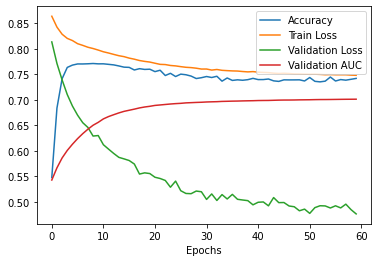

In [ ]:
figure = plt.figure()
plt.plot(range(num_epochs), accuracies_debtcon, label = 'Accuracy')
plt.plot(range(num_epochs), tr_losses_debtcon, label = 'Train Loss')
plt.plot(range(num_epochs), val_losses_debtcon, label = 'Validation Loss')
plt.plot(range(num_epochs), val_AUC_debtcon, label = 'Validation AUC')
plt.xlabel('Epochs')
plt.legend()
plt.show()
plt.save('base model')

## Experiments on lendingclub

In this section, we save the parameters learnt in the aforementioned task and transfer them directly to the lending club data on credit card. This direct transfer is enabled by the fact that the input dimension is the same and the feature space is the same, which is why we think it is fair to assume that the parameter space should not differ either. We perform a series of experiments with the lending club data, progressively decreasing the magnitude of transfer knowledge in the model and progressively relying more on the target domain. We have the decided to keep the number of data points quite small to prove that: (i) Transfer model outperforms as compared to model trained from scratch when dataset is small, (ii) Transfer learning is a powerful tool, which learns quickly and adapts to new information quite fast.

Before moving on, it is imperative for the reader to keep in mind that we train the output layer in all the experiments to avoid implicitly assuming same class-conditional distributions. One last important remark is that we run the expriments several times to factor in the dependence on weight initialization and that is why we comment on the results that we observed after running the experiment multiple times. We, therefore, advise the reader to also run the experiments multiple times to gauge the performance on average.

In [ ]:
#saving parameters from the base model
state_dict_base = base_model.state_dict()

In this section, we will assess the capability of transfer learning for relatively few data instances. Given that we have trained a four-layer neural network, the idea is to progressively decrease the information we provide to the model we train on the credit card dataset.

In [ ]:
#subset of the credit card data

indices = list(range(len(df_credit)))
split = int(np.floor(0.99*len(df_credit)))
np.random.seed(1337)
np.random.shuffle(indices)
train_indices = indices[split:]
df_credit_subset = df_credit.iloc[train_indices]

In [ ]:
X_credit, y_credit = features_target(df_credit_subset, target = 'target')
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, stratify = y_credit, test_size = 0.25)
trainset_credit = torch.utils.data.TensorDataset(torch.tensor(X_train_credit.to_numpy(), dtype = torch.float32), torch.tensor(y_train_credit.to_numpy(), dtype = torch.float32).reshape(-1,1))
testset_credit = torch.utils.data.TensorDataset(torch.tensor(X_test_credit.to_numpy(), dtype = torch.float32), torch.tensor(y_test_credit.to_numpy(), dtype = torch.float32).reshape(-1,1))
batch_size = 32
train_dl_credit = DataLoader(trainset_credit, batch_size= batch_size, shuffle = True)
val_dl_credit = DataLoader(testset_credit, batch_size = batch_size, shuffle = False)

We construct another model that we will refer to as the 'transfer model' throughout the notebook. As previously stated, we transfer the parameter structure of the first three layers, then we insert another hidden layer and then an output layer. The last hidden layer is supposed to learn task-specific knowledge and the output layer is supposed to help estimate task-specific distribution

In [ ]:
class transferBAD(nn.Module):
    def __init__(self, dropout= 0.2,
                 no_of_hiddens1=28, no_of_hiddens2=28, no_of_hiddens3=28, no_of_hiddens4 = 28, no_of_hiddens5 = 28,
                 no_of_outputs=1, input_features= None):
        super(transferBAD, self).__init__()

        self.FC1 = nn.Linear(in_features=input_features,
                             out_features=no_of_hiddens1)
        self.bn1 = nn.BatchNorm1d(no_of_hiddens1)


        self.FC2 = nn.Linear(in_features=no_of_hiddens1,
                             out_features=no_of_hiddens2)
        self.bn2 = nn.BatchNorm1d(no_of_hiddens2)

        self.FC3 = nn.Linear(in_features=no_of_hiddens2,
                             out_features=no_of_hiddens3)
        self.bn3 = nn.BatchNorm1d(no_of_hiddens3)
        self.dropout3 = nn.Dropout(dropout)

        self.FC4 = nn.Linear(in_features=no_of_hiddens3,
                             out_features=no_of_hiddens4)
        self.bn4 = nn.BatchNorm1d(no_of_hiddens3)
        self.dropout4 = nn.Dropout(0.2)

        self.FC5 = nn.Linear(in_features=no_of_hiddens5,
                             out_features=no_of_outputs)


    def forward(self, x):
        x = self.FC1(x)
        x = self.bn1(x)
        x = F.relu(x)

        x = self.FC2(x)
        x = self.bn2(x)
        x = F.relu(x)
        #x = self.dropout2(x)

        x = self.FC3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout3(x)

        x = self.FC4(x)
        x = self.bn4(x)
        x = F.relu(x)
        x = self.dropout4(x)

        x = self.FC5(x)

        return x

### Experiment  No. 1

Below we freeze the first the first layers and train the fourth hidden layer and the output layer. We set the number of epochs to be relatively high, so that we can assess the convergence rates of both models. We hypothesize that the transfer model will converge faster due to strong prior knowledge. Having said that, the higher number of epochs will allow us to test if the model trained from scratch will eventually outperform the transfer model.


The figure below confirms our hypothesis and learns to distinguish between the classes fast. Secondly, the transfer model clearly outperforms in this setting.

In [ ]:
#only the last hidden layer and the output layer are trainable

model= transferBAD(input_features = X_train_credit.shape[1])
with torch.no_grad():
    model.FC1.weight.copy_(state_dict_base['FC1.weight'])
    model.FC1.bias.copy_(state_dict_base['FC1.bias'])
    model.FC2.weight.copy_(state_dict_base['FC2.weight'])
    model.FC2.bias.copy_(state_dict_base['FC2.bias'])
    model.FC3.weight.copy_(state_dict_base['FC3.weight'])
    model.FC3.bias.copy_(state_dict_base['FC3.bias'])
    #model.FC4.weight.copy_(state_dict_base['FC4.weight'])
    #model.FC4.bias.copy_(state_dict_base['FC4.bias'])

for name, param in model.FC1.named_parameters():
    param.requires_grad = False

for name, param in model.FC2.named_parameters():
    param.requires_grad = False

for name, param in model.FC3.named_parameters():
    param.requires_grad = False

#training transfer model

num_epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_credit_, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit_transferred3, preds_credit = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)

#training from scratch

model= ClassifyBAD(input_features = X_train_credit.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_credit, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit, _ = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)

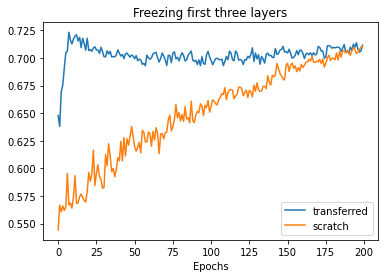

In [ ]:
figure = plt.figure()
plt.plot(range(num_epochs), val_AUC_credit_transferred3, label = 'transferred')
plt.plot(range(num_epochs), val_AUC_credit, label = 'scratch')
plt.xlabel('Epochs')
plt.legend()
plt.title('Freezing first three layers')
plt.show()
plt.save('exp 1')

### Experiment No. 2

We now account for the possibility that the original ClassifyBAD model is deep and, as a result, has a lot of parameters to learn, which could result in underwhelming performance. Therefore, we try to build a smaller neural network to rule out any such possibility, but we do not observe a significant change in the results

In [ ]:
class ClassifyBADSmall(nn.Module):
    def __init__(self, dropout= 0.2,
                 no_of_hiddens1=32, no_of_hiddens2=32,
                 no_of_outputs=1, input_features= None):
        super(ClassifyBADSmall, self).__init__()

        self.FC1 = nn.Linear(in_features=input_features,
                             out_features=no_of_hiddens1)
        self.dropout1 = nn.Dropout(dropout)
        self.bn1 = nn.BatchNorm1d(no_of_hiddens1)

        self.FC2 = nn.Linear(in_features=no_of_hiddens1,
                             out_features=no_of_outputs)


    def forward(self, x):
        x = self.FC1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)

        x = self.FC2(x)

        return x

In [ ]:
#only the last hidden layer and the output layer are trainable

model= transferBAD(input_features = X_train_credit.shape[1])
with torch.no_grad():
    model.FC1.weight.copy_(state_dict_base['FC1.weight'])
    model.FC1.bias.copy_(state_dict_base['FC1.bias'])
    model.FC2.weight.copy_(state_dict_base['FC2.weight'])
    model.FC2.bias.copy_(state_dict_base['FC2.bias'])
    model.FC3.weight.copy_(state_dict_base['FC3.weight'])
    model.FC3.bias.copy_(state_dict_base['FC3.bias'])
    #model.FC4.weight.copy_(state_dict_base['FC4.weight'])
    #model.FC4.bias.copy_(state_dict_base['FC4.bias'])

for name, param in model.FC1.named_parameters():
    param.requires_grad = False

for name, param in model.FC2.named_parameters():
    param.requires_grad = False

for name, param in model.FC3.named_parameters():
    param.requires_grad = False

#training transfer model

num_epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_credit_, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit_transferred3_small, preds_credit = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)

#training from scratch

model= ClassifyBADSmall(input_features = X_train_credit.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_credit, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit, _ = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)

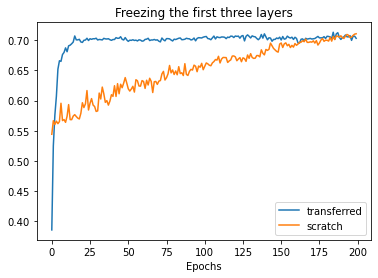

In [ ]:
figure = plt.figure()
plt.plot(range(num_epochs), val_AUC_credit_transferred3_small, label = 'transferred')
plt.plot(range(num_epochs), val_AUC_credit, label = 'scratch')
plt.xlabel('Epochs')
plt.legend()
plt.title('Freezing the first three layers')
plt.show()
plt.save('exp 2')

### Experiment No. 3

We transfer the parameter structure for the first two layers while we train the remaining layers of the neural network. The trasnfer model converges faster, but not as quick as it did in the first experiment. And again, the transfer model outperforms the model trained from scratch.

In [ ]:
#3rd and 4th hidden layers and the output layer are trainable

model= ClassifyBAD(input_features = X_train_credit.shape[1])

with torch.no_grad():
    model.FC1.weight.copy_(state_dict_base['FC1.weight'])
    model.FC1.bias.copy_(state_dict_base['FC1.bias'])
    model.FC2.weight.copy_(state_dict_base['FC2.weight'])
    model.FC2.bias.copy_(state_dict_base['FC2.bias'])
    #model.FC3.weight.copy_(state_dict_base['FC3.weight'])
    #model.FC3.bias.copy_(state_dict_base['FC3.bias'])
    #model.FC4.weight.copy_(state_dict_base['FC4.weight'])
    #model.FC4.bias.copy_(state_dict_base['FC4.bias'])


for name, param in model.FC1.named_parameters():
    param.requires_grad = False

for name, param in model.FC2.named_parameters():
    param.requires_grad = False

num_epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_credit_, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit_transferred2, preds_credit = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)

#training from scratch

model= ClassifyBAD(input_features = X_train_credit.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_credit, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit, _ = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)

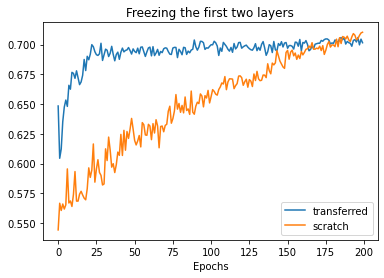

In [ ]:
figure = plt.figure()
plt.plot(range(num_epochs), val_AUC_credit_transferred2, label = 'transferred')
plt.plot(range(num_epochs), val_AUC_credit, label = 'scratch')
plt.xlabel('Epochs')
plt.title('Freezing the first two layers')
plt.legend()
plt.show()
plt.save('exp 3')

### Experiment No. 4

In this experiment, we transfer the weight structure only for the first layer. Once again, there has been no significant change in the results. Although, the transfer model converges a bit slower as compared to the transfer models in previous experiments.

In [ ]:
#all layers are trainable except the first layer

model= ClassifyBAD(input_features = X_train_credit.shape[1])

with torch.no_grad():
    model.FC1.weight.copy_(state_dict_base['FC1.weight'])
    model.FC1.bias.copy_(state_dict_base['FC1.bias'])

for name, param in model.FC1.named_parameters():
    param.requires_grad = False

num_epochs = 200
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_credit_, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit_transferred1, preds_credit = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)

#training from scratch

model= ClassifyBAD(input_features = X_train_credit.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_credit, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit, _ = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)


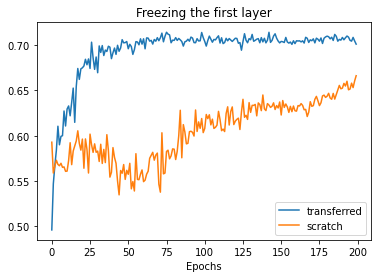

<Figure size 432x288 with 0 Axes>

In [ ]:
num_epochs = 200
figure = plt.figure()
plt.plot(range(num_epochs), val_AUC_credit_transferred1, label = 'transferred')
plt.plot(range(num_epochs), val_AUC_credit, label = 'scratch')
plt.xlabel('Epochs')
plt.legend()
plt.title('Freezing the first layer')
plt.show()
plt.savefig('exp 4')

### Some comments on convergence and time complexity

We observed that in this specific setting where the datasets share the same feature space and dimensions and the dataset has relatively very few data points, the transfer model generally outperforms and converges quickly. There are several important takeaways from this series of experiments. First, the transfer model yields great results according to our chosen performance metric (AUC); and secondly, the fast convergence rate implies less computational complexity and scaleability of the transfer model. This is particularly siginficant and practical for cases where financial institutions have same kinds of datasets.

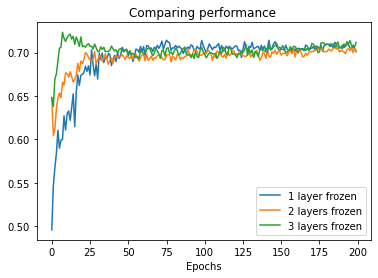

In [ ]:
figure = plt.figure()
plt.plot(range(num_epochs), val_AUC_credit_transferred1, label = '1 layer frozen')
plt.plot(range(num_epochs), val_AUC_credit_transferred2, label = '2 layers frozen')
plt.plot(range(num_epochs), val_AUC_credit_transferred3, label = '3 layers frozen')
plt.xlabel('Epochs')
plt.title('Comparing performance ')
plt.legend()
plt.savefig('comparison')

### Experiment No. 5

We now use all the available lending club data on credit card. Naturally, we hypothesized that the model trained from scratch would outperform the transfer model. Our experiment confirms our hpyothesis and the explanation is quite straightforward: a high number of data instances provide more information to the network.

In [ ]:
X_credit, y_credit = features_target(df_credit, target = 'target')
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, stratify = y_credit, test_size = 0.25)
trainset_credit = torch.utils.data.TensorDataset(torch.tensor(X_train_credit.to_numpy(), dtype = torch.float32), torch.tensor(y_train_credit.to_numpy(), dtype = torch.float32).reshape(-1,1))
testset_credit = torch.utils.data.TensorDataset(torch.tensor(X_test_credit.to_numpy(), dtype = torch.float32), torch.tensor(y_test_credit.to_numpy(), dtype = torch.float32).reshape(-1,1))
batch_size = 32
train_dl_credit = DataLoader(trainset_credit, batch_size= batch_size, shuffle = True)
val_dl_credit = DataLoader(testset_credit, batch_size = batch_size, shuffle = False)

In [ ]:
#only output layer is trainable
model= ClassifyBAD(input_features = X_train_credit.shape[1])
with torch.no_grad():
    model.FC1.weight.copy_(state_dict_base['FC1.weight'])
    model.FC1.bias.copy_(state_dict_base['FC1.bias'])
    model.FC2.weight.copy_(state_dict_base['FC2.weight'])
    model.FC2.bias.copy_(state_dict_base['FC2.bias'])
    model.FC3.weight.copy_(state_dict_base['FC3.weight'])
    model.FC3.bias.copy_(state_dict_base['FC3.bias'])
    #model.FC4.weight.copy_(state_dict_base['FC4.weight'])
    #model.FC4.bias.copy_(state_dict_base['FC4.bias'])

for name, param in model.FC1.named_parameters():
    param.requires_grad = False

for name, param in model.FC2.named_parameters():
    param.requires_grad = False

for name, param in model.FC3.named_parameters():
    param.requires_grad = False

#training transfer model

num_epochs = 30
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([3]))
model_credit_, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit_transferred, preds_credit = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)

#training from scratch

model= ClassifyBAD(input_features = X_train_credit.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([3]))
model_credit, tr_losses_credit, val_losses_credit, accuracies_credit, val_AUC_credit, _ = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_credit, val_loader = val_dl_credit,
     batch_size = batch_size)

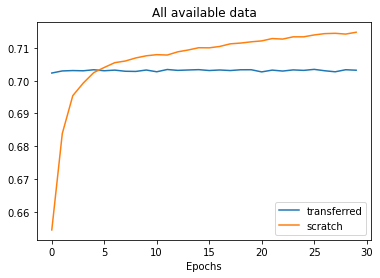

In [ ]:
figure = plt.figure()
plt.plot(range(num_epochs), val_AUC_credit_transferred, label = 'transferred')
plt.plot(range(num_epochs), val_AUC_credit, label = 'scratch')
plt.xlabel('Epochs')
plt.legend()
plt.title('All available data')
plt.savefig('exp 5')

## Experimenting with HMEQ Dataset

To assess the potential of transfer learning for different domains, feature spaces and input dimensions, we design a neural network that uses just the first layer of the network trained on lending club data. To match the dimensions, we insert a layer that would map the inputs from hmeq dataset to the latent feature space extracted from the lending club data - we hypothesize that doing so would assist the network in matching distributions of the hmeq dataset and the latent features from the lending club. We then add more layers to extract information from the target domain (hmeq dataset) in this case. Moreover, we set all the layers to be retrainable. We understand that this is a naive approach and in no way should serve as sufficient in and of itself. However, this should only serve as a basis for further analysis that would incorporate Maximum Domain Discrepancy and joint training of the the source and target domain (where scarcity of data is the main issue).

In [ ]:
df_hmeq = pd.read_csv('./Datasets/prepared_data/hmeq.csv')

df_hmeq.drop(columns = ['REASON', 'JOB'], inplace = True)

#df_hmeq.dropna(how = 'any', inplace = True)

In [ ]:
bad = {'BAD': 1, 'GOOD': 0}
df_hmeq['BAD'] = df_hmeq.BAD.map(bad)
df_hmeq = df_hmeq.apply(pd.to_numeric)
sample = df_hmeq.sample(frac = 0.2)
len(sample)
X_hmeq, y_hmeq = features_target(sample, target = 'BAD')
X_hmeq = minmax_scale(trim(X_hmeq, X_hmeq.columns), X_hmeq.columns)
X_train_hmeq, X_test_hmeq, y_train_hmeq, y_test_hmeq = train_test_split(X_hmeq, y_hmeq, stratify = y_hmeq, test_size = 0.25)
trainset_hmeq = torch.utils.data.TensorDataset(torch.tensor(X_train_hmeq.to_numpy(), dtype = torch.float32), torch.tensor(y_train_hmeq.to_numpy(), dtype = torch.float32).reshape(-1,1))
testset_hmeq = torch.utils.data.TensorDataset(torch.tensor(X_test_hmeq.to_numpy(), dtype = torch.float32), torch.tensor(y_test_hmeq.to_numpy(), dtype = torch.float32).reshape(-1,1))
batch_size = 32
train_dl_hmeq = DataLoader(trainset_hmeq, batch_size= batch_size, shuffle = True)
val_dl_hmeq = DataLoader(testset_hmeq, batch_size = batch_size, shuffle = False)

In [ ]:
class Classify(nn.Module):
    def __init__(self, dropout2=0.2, dropout3=0.2,
                 no_of_hiddens1=28, no_of_hiddens2=28, no_of_hiddens3=28, no_of_outputs=1, input_features= None,
                 no_of_transfers = None):
        super(Classify, self).__init__()

        self.bridge = nn.Linear(in_features=input_features,
                             out_features=no_of_transfers)
        self.bnbridge = nn.BatchNorm1d(no_of_transfers)

        self.FC1 = nn.Linear(in_features=no_of_transfers,
                             out_features=no_of_hiddens1)
        self.bn1 = nn.BatchNorm1d(no_of_hiddens1)


        self.FC2 = nn.Linear(in_features=no_of_hiddens1,
                             out_features=no_of_hiddens2)
        self.dropout2 = nn.Dropout(dropout2)
        self.bn2 = nn.BatchNorm1d(no_of_hiddens2)

        self.FC3 = nn.Linear(in_features=no_of_hiddens2,
                             out_features=no_of_hiddens3)
        self.dropout3 = nn.Dropout(dropout3)
        self.bn3 = nn.BatchNorm1d(no_of_hiddens3)

        self.FC4 = nn.Linear(in_features=no_of_hiddens3,
                             out_features=no_of_outputs)


    def forward(self, x):
        x = self.bridge(x)
        x = F.relu(x)
        x = self.bnbridge(x)

        x = self.FC1(x)
        x = self.bn1(x)
        x = F.relu(x)

        x = self.FC2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)

        x = self.FC3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout3(x)

        x = self.FC4(x)

        return x

In [ ]:
#only output layer is trainable
model= Classify(input_features = X_train_hmeq.shape[-1], no_of_transfers = X_train.shape[-1],)
with torch.no_grad():
    model.FC1.weight.copy_(state_dict_base['FC1.weight'])
    model.FC1.bias.copy_(state_dict_base['FC1.bias'])
    #model.FC2.weight.copy_(state_dict_base['FC2.weight'])
    #model.FC2.bias.copy_(state_dict_base['FC2.bias'])
    #model.FC3.weight.copy_(state_dict_base['FC3.weight'])
    #model.FC3.bias.copy_(state_dict_base['FC3.bias'])
    #model.FC4.weight.copy_(state_dict_base['FC4.weight'])
    #model.FC4.bias.copy_(state_dict_base['FC4.bias'])

#for name, param in model.FC1.named_parameters():
#    param.requires_grad = False
#
#for name, param in model.FC2.named_parameters():
#    param.requires_grad = False
#
#for name, param in model.FC3.named_parameters():
#    param.requires_grad = False

#training transfer model

num_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_hmeq_, tr_losses_hmeq, val_losses_hmeq, accuracies_hmeq_transferred, val_AUC_hmeq_transferred, preds_hmeq = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_hmeq, val_loader = val_dl_hmeq,
     batch_size = batch_size)

#training from scratch

model= Classify(input_features = X_train_hmeq.shape[-1], no_of_transfers = X_train.shape[-1])
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss_func = nn.BCEWithLogitsLoss(pos_weight = torch.FloatTensor([2]))
model_hmeq, tr_losses_hmeq, val_losses_hmeq, accuracies_hmeq, val_AUC_hmeq, _ = train(model = model, num_epochs = num_epochs, loss_func = loss_func,
      optimizer = optimizer, train_loader = train_dl_hmeq, val_loader = val_dl_hmeq,
     batch_size = batch_size)

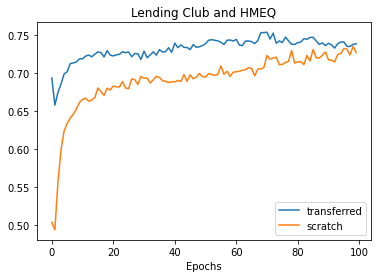

<Figure size 432x288 with 0 Axes>

In [ ]:
figure = plt.figure()
plt.plot(range(num_epochs), val_AUC_hmeq_transferred, label = 'transferred')
plt.plot(range(num_epochs), val_AUC_hmeq, label = 'scratch')
plt.xlabel('Epochs')
plt.legend()
plt.title('Lending Club and HMEQ')
plt.show()
plt.savefig('exp 6')

# **CONCLUSION**

We experimented with lending club data to prove that transfer learning is indeed a useful tool in the realm of credit finance, albeit with several restrictions and assumptions imposed. We showed that progressively decreasing trasnfer of information resulted in slower convergence of the model; however, we did not observe and signficant decline in the performance. We also naively experimented with the hmeq dataset using information from the base model trained on lending club data on debt consolidation. Although, we noticed that there were some gains to be had even with such a naive approach, we are unable to offer any mathematical justification for that. Intuitively, it is possible that when the network maps the input of the target domain (hmeq) to the latent feature representation of the data from source domain, it is able to detect some correlation and propagate that forward to yield slightly improved performance.

The next step is to effectively factor in Maximum Mean Discrepancy in our loss function and jointly train the source and target tasks, such that negative transfer is less probable and only relevant feature knowledge is passed on to the target task where data is scarce.

#**SOURCES**

1. Suryanto, H., Guan, C., Voumard, A., & Beydoun, G. (2019). Transfer learning in credit risk. In Joint European Conference on Machine Learning and Knowledge Discovery in Databases (pp. 483-498)
2. Sinno Jialin Pan , Qiang Yang (2010). A Survey on Transfer Learning. IEEE Trans. Knowl. Data Eng. 22(10) (pp. 1345-1359)
3. Wen Xu, Jing He Yanfeng Shu (2020). Transfer Learning and Deep Domain Adaptation. Advances and Applications in Deep Learning
4. Karl Weiss, Taghi M. Khoshgoftaar, DingDing Wang (2016). A survey of transfer learning. Journal of Big Data (3:9)
5. Tommasi T, Orabona F, Caputo B. Safety in numbers: learning categories from few examples with multi model
knowledge transfer. IEEE Conf Comput Vision Pattern Recog. 2010;2010:3081–8.

In [ ]:
%%shell
jupyter nbconvert --to html /content/Transfer_learning_Fahad_Maksym.ipynb


[NbConvertApp] Converting notebook /content/Transfer_learning_Fahad_Maksym.ipynb to html
[NbConvertApp] Writing 689320 bytes to /content/Transfer_learning_Fahad_Maksym.html
